In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='02-Chunk4', logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = [predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 4

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1827.791, BIC=1846.175, Fit time=1.760 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1962.638, BIC=1977.345, Fit time=0.478 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1864.170, BIC=1878.877, Fit time=1.060 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1829.085, BIC=1851.146, Fit time=2.038 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1986.101, BIC=2000.808, Fit time=0.609 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1831.230, BIC=1856.967, Fit time=5.888 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1811.604, BIC=1833.664, Fit time=2.198 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error: 5.07417608657  Num NaN: 0'

'Test Error: 6.38998095112    Num NaN: 0'

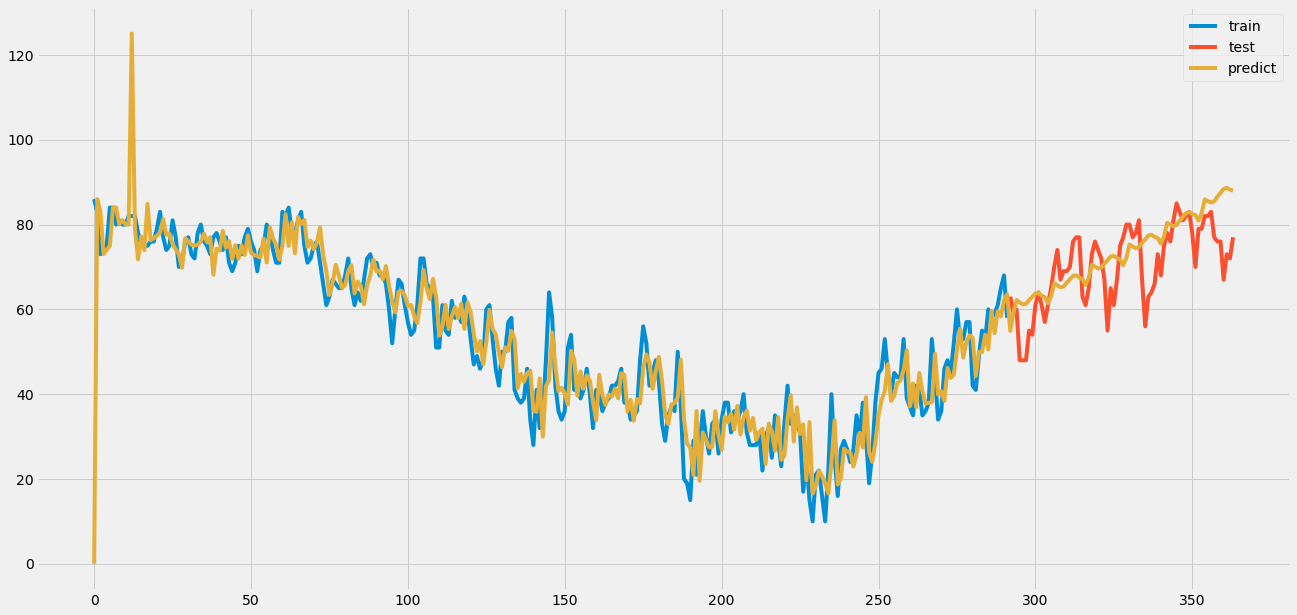

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 4.50479452055  Num NaN: 0'

'Test Error: 4.60555555556    Num NaN: 0'

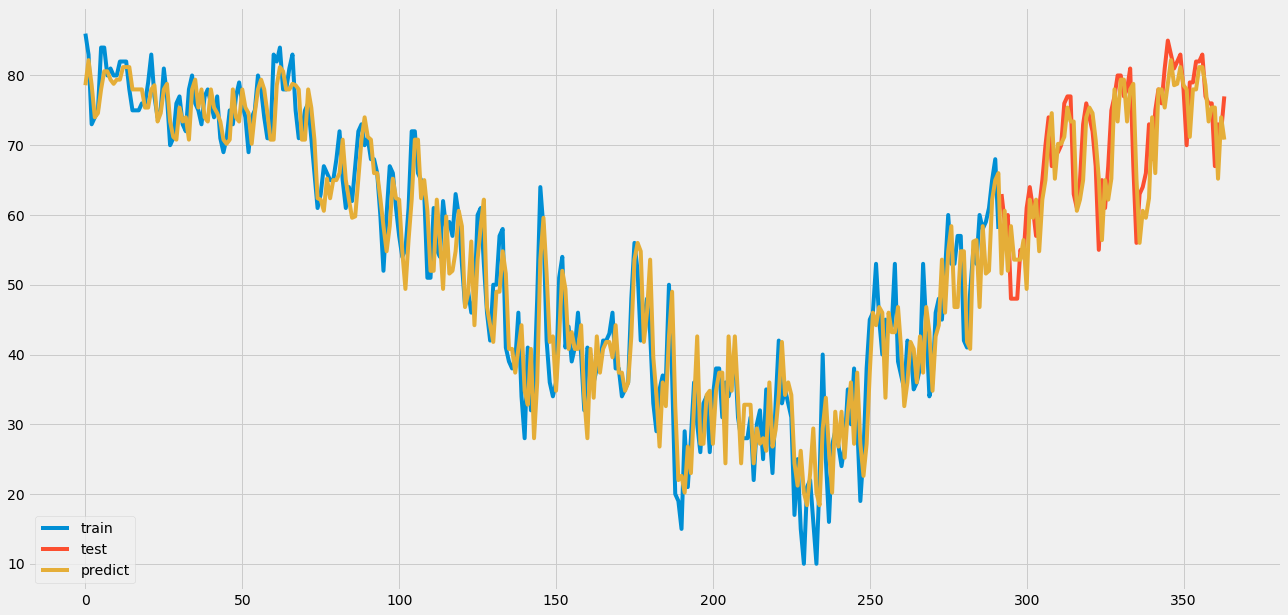

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 3.00630332123e+12  Num NaN: 0'

'Test Error: 4.01591318966e+12    Num NaN: 0'

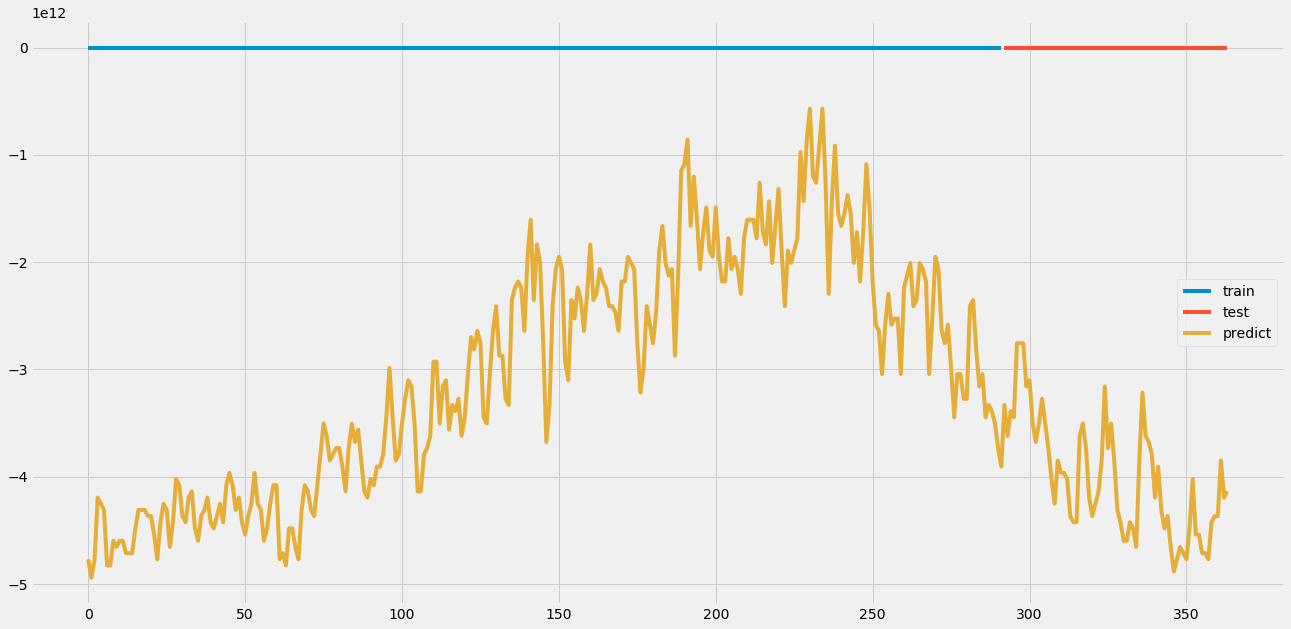

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 4.32339808293  Num NaN: 0'

'Test Error: 4.45307526031    Num NaN: 0'

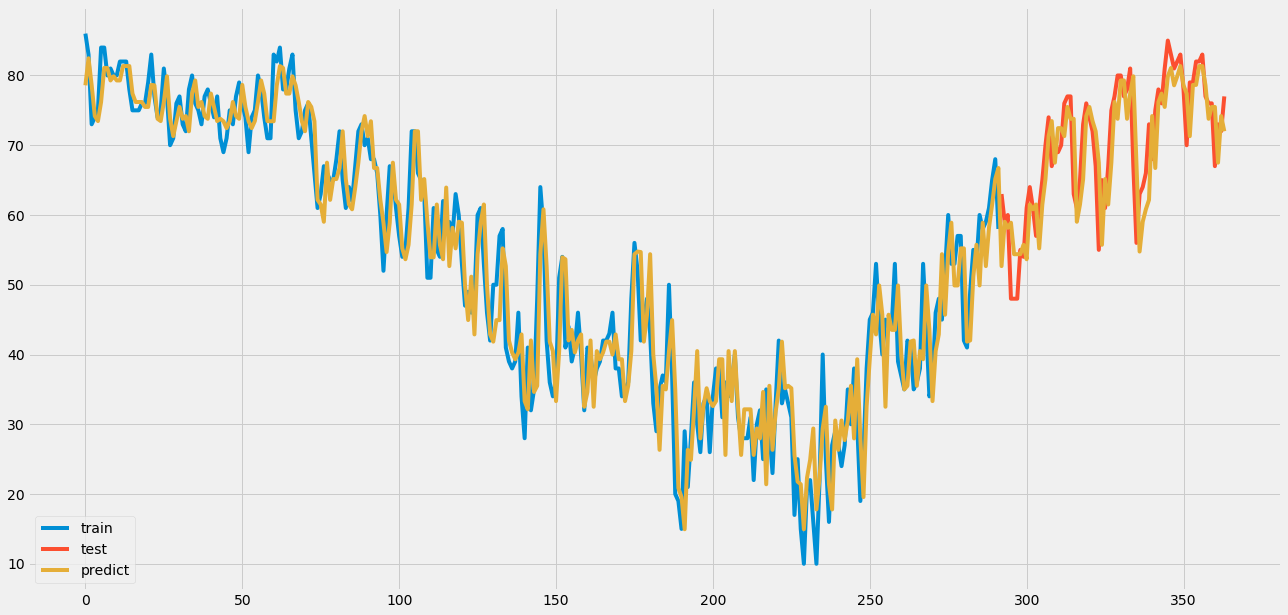

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 4.64750135971  Num NaN: 0'

'Test Error: 4.69885054674    Num NaN: 0'

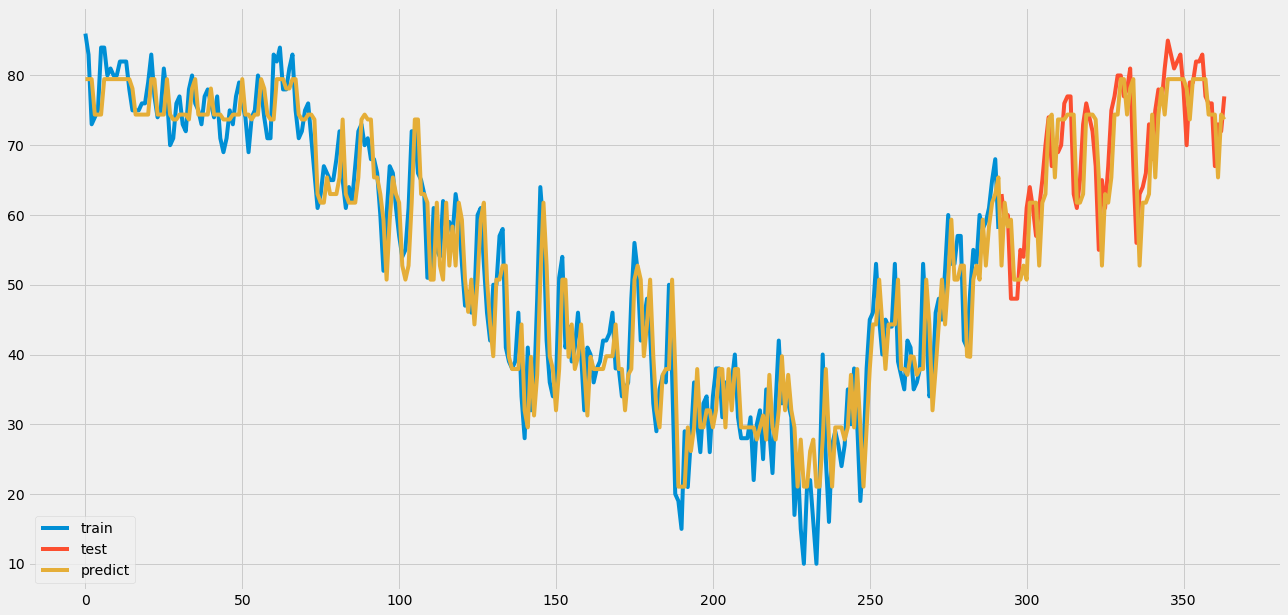

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 4.26186738031  Num NaN: 0'

'Test Error: 4.49174492061    Num NaN: 0'

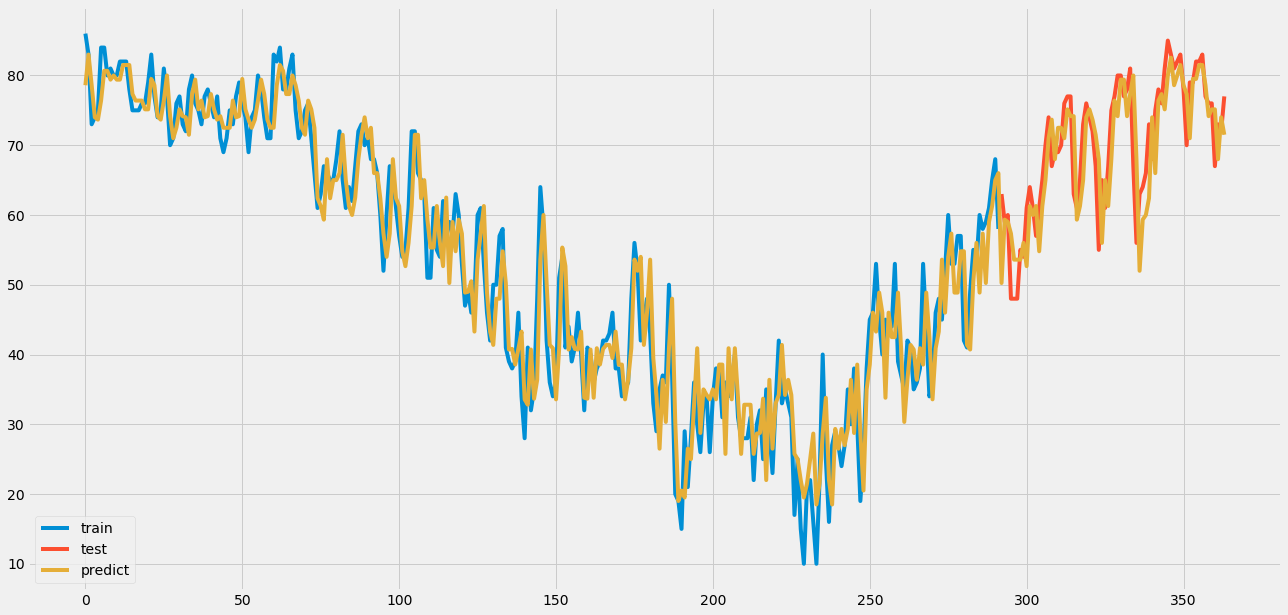

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 5.81543892214  Num NaN: 4'

'Test Error: 6.42686518234    Num NaN: 4'

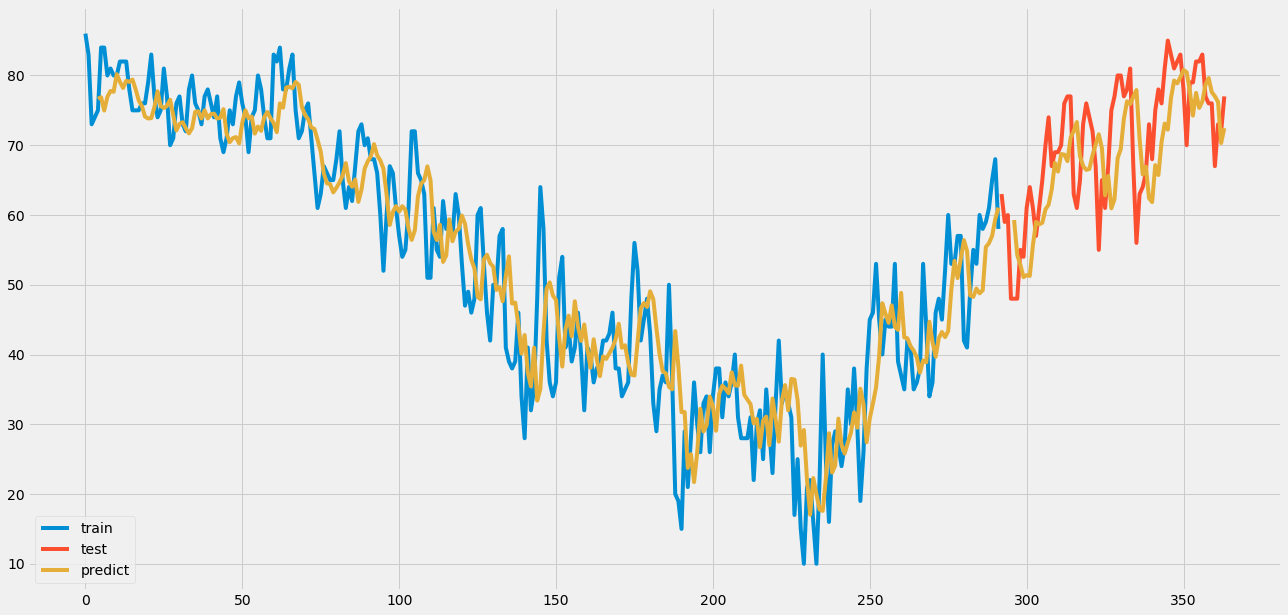

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 288 samples, validate on 68 samples
Epoch 1/10
 - 1s - loss: 0.2129 - val_loss: 0.1362
Epoch 2/10
 - 0s - loss: 0.1892 - val_loss: 0.2660
Epoch 3/10
 - 0s - loss: 0.1825 - val_loss: 0.1544
Epoch 4/10
 - 0s - loss: 0.1829 - val_loss: 0.2614
Epoch 5/10
 - 0s - loss: 0.1766 - val_loss: 0.1786
Epoch 6/10
 - 0s - loss: 0.1771 - val_loss: 0.1664
Epoch 7/10
 - 0s - loss: 0.1738 - val_loss: 0.1776
Epoch 8/10
 - 0s - loss: 0.1754 - val_loss: 0.1158
Epoch 9/10
 - 0s - loss: 0.1773 - val_loss: 0.2074
Epoch 10/10
 - 0s - loss: 0.1735 - val_loss: 0.1501


'Train Error: 12.0262987713  Num NaN: 4'

'Test Error: 11.2565942091    Num NaN: 4'

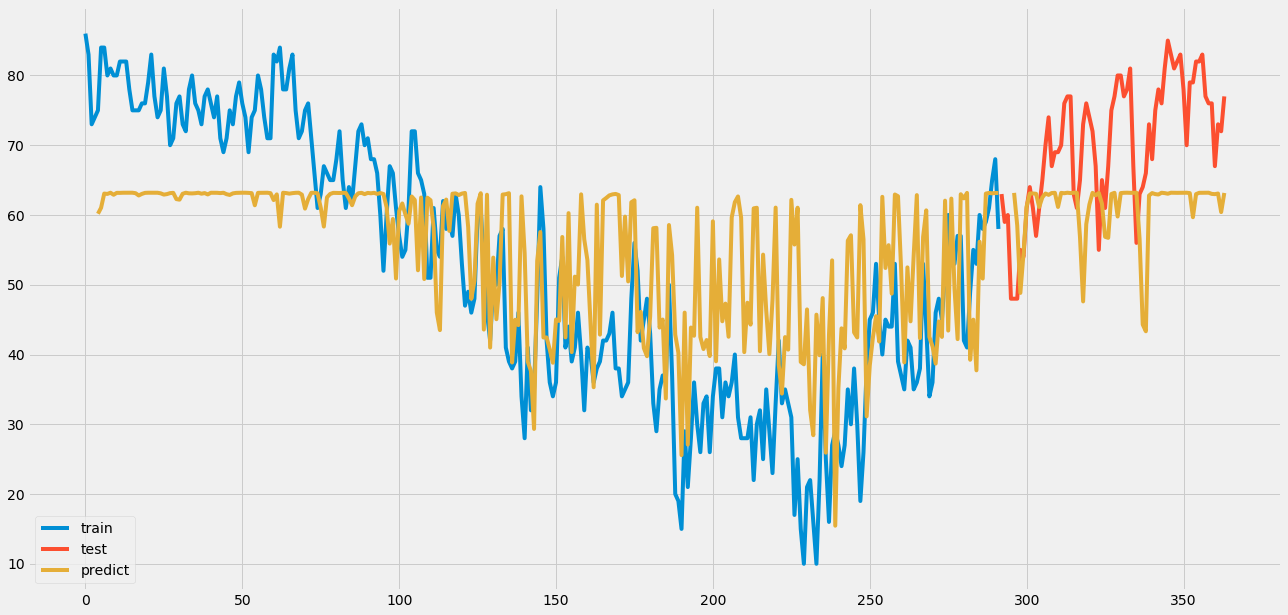

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 288 samples, validate on 68 samples
Epoch 1/10
 - 1s - loss: 0.3505 - val_loss: 0.3741
Epoch 2/10
 - 0s - loss: 0.2303 - val_loss: 0.1749
Epoch 3/10
 - 0s - loss: 0.2464 - val_loss: 0.1272
Epoch 4/10
 - 0s - loss: 0.2343 - val_loss: 0.1874
Epoch 5/10
 - 0s - loss: 0.2406 - val_loss: 0.1984
Epoch 6/10
 - 0s - loss: 0.2352 - val_loss: 0.1485
Epoch 7/10
 - 0s - loss: 0.2372 - val_loss: 0.3702
Epoch 8/10
 - 0s - loss: 0.2362 - val_loss: 0.1371
Epoch 9/10
 - 0s - loss: 0.2504 - val_loss: 0.5193
Epoch 10/10
 - 0s - loss: 0.2390 - val_loss: 0.3015


'Train Error: 16.5506961346  Num NaN: 4'

'Test Error: 22.6159991096    Num NaN: 4'

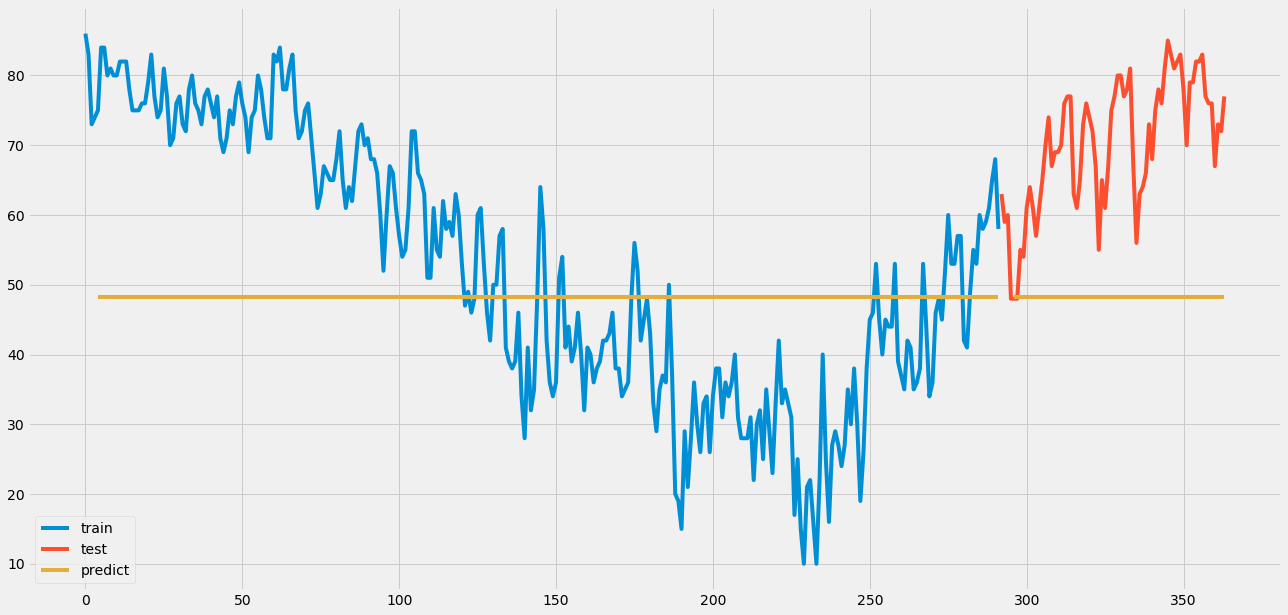

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

Train on 74 samples, validate on 19 samples
Epoch 1/10
 - 1s - loss: 1.0411 - val_loss: 0.6463
Epoch 2/10
 - 0s - loss: 0.4655 - val_loss: 0.3777
Epoch 3/10
 - 0s - loss: 0.2741 - val_loss: 0.2316
Epoch 4/10
 - 0s - loss: 0.1654 - val_loss: 0.1350
Epoch 5/10
 - 0s - loss: 0.1010 - val_loss: 0.0826
Epoch 6/10
 - 0s - loss: 0.0636 - val_loss: 0.0519
Epoch 7/10
 - 0s - loss: 0.0402 - val_loss: 0.0325
Epoch 8/10
 - 0s - loss: 0.0251 - val_loss: 0.0197
Epoch 9/10
 - 0s - loss: 0.0158 - val_loss: 0.0122
Epoch 10/10
 - 0s - loss: 0.0107 - val_loss: 0.0079


'Train Error: 87.0625605191  Num NaN: 0'

'Test Error: 79.942788389    Num NaN: 0'

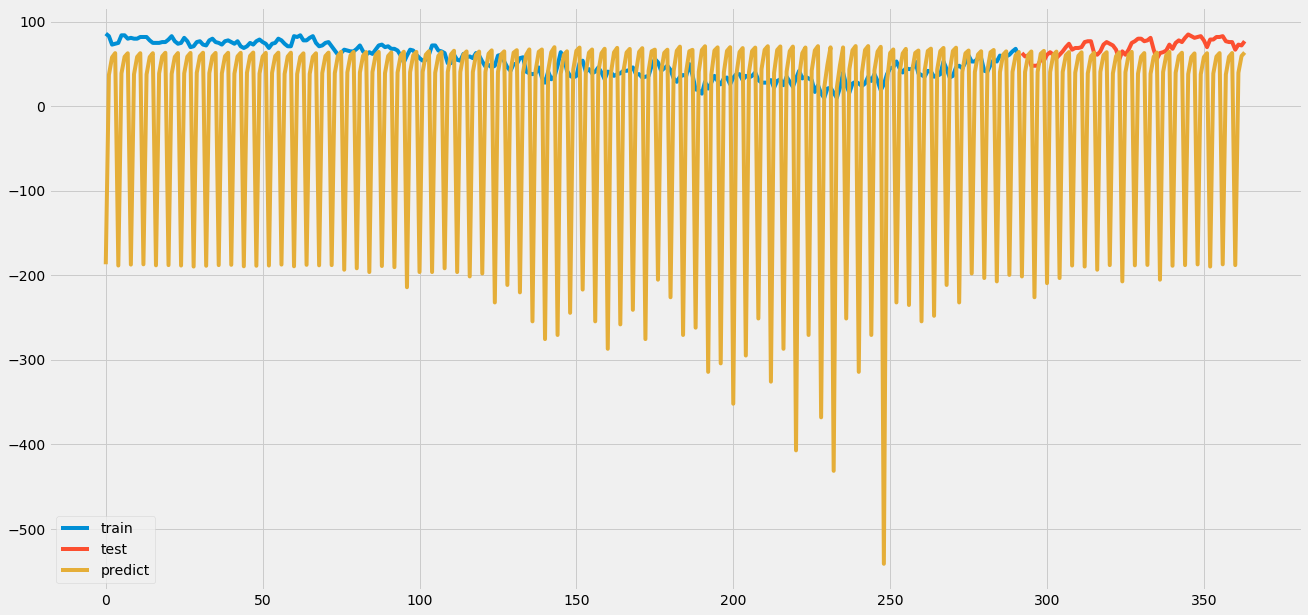

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 2s - loss: 0.6540 - val_loss: 0.4851
Epoch 2/10
 - 1s - loss: 0.4526 - val_loss: 0.3790
Epoch 3/10
 - 1s - loss: 0.3388 - val_loss: 0.3078
Epoch 4/10
 - 1s - loss: 0.2595 - val_loss: 0.2563
Epoch 5/10
 - 1s - loss: 0.1995 - val_loss: 0.2182
Epoch 6/10
 - 1s - loss: 0.1557 - val_loss: 0.1881
Epoch 7/10
 - 1s - loss: 0.1249 - val_loss: 0.1634
Epoch 8/10
 - 1s - loss: 0.0974 - val_loss: 0.1377
Epoch 9/10
 - 1s - loss: 0.0798 - val_loss: 0.1174
Epoch 10/10
 - 1s - loss: 0.0689 - val_loss: 0.1028


'Train Error: 614.146626342  Num NaN: 0'

'Test Error: 1036.48435805    Num NaN: 0'

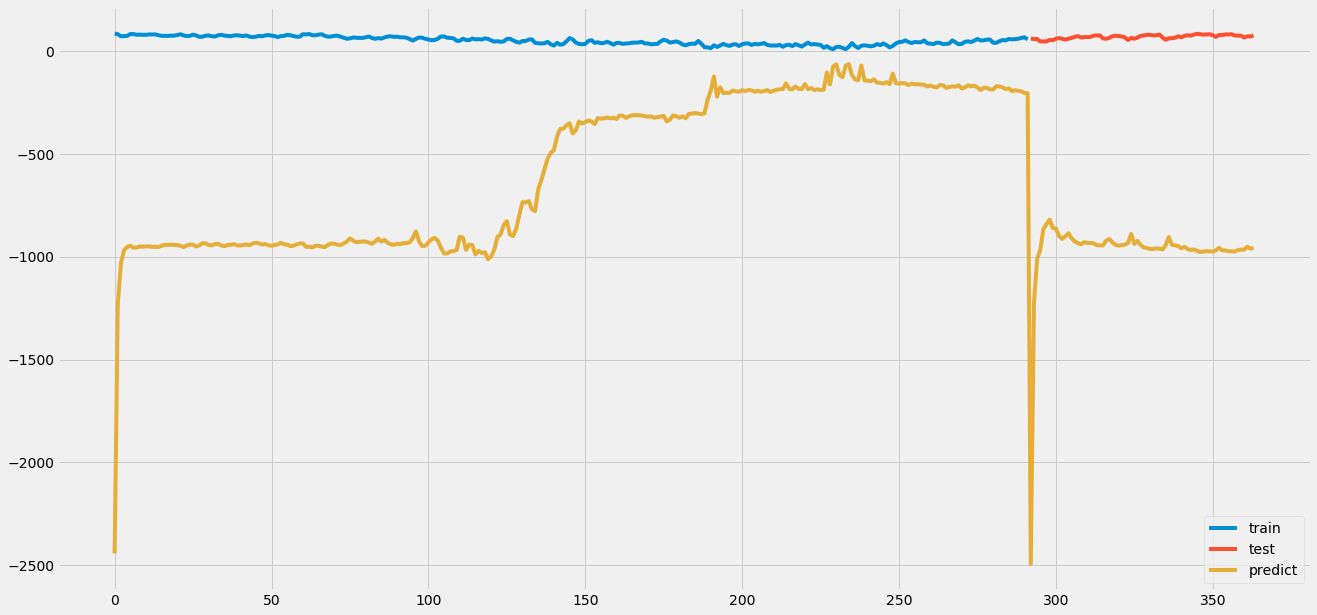

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')